In [5]:
%load_ext autoreload
%autoreload 2

%pylab inline

import dataloaders
import models
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics 
import sklearn.cluster as cluster
import numpy as np 
import random
import classifiers
from torch.autograd import Variable
import torch
import torch.nn as nn 
import torch.optim as optim
import util

from imblearn.under_sampling import RandomUnderSampler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/Users/inzamamrahaman/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
dataset = 'tribes'
edges_file = f'../data/comm/{dataset}-cleaned.csv'
class_file = f'../data/comm/{dataset}-classes.csv'
data = dataloaders.SenateDataset(edges_file, class_file, ratio=0.8, delimiter=',')

In [113]:
num_nodes = data.get_num_nodes()
dims = 32
epochs = 600
lr = 0.025
lr_decay=0.0
weight_decay=0.0
lam = 0.000055
X_train, y_train = data.get_training_set()
X_test, y_test = data.get_testing_set()
p = 2
X = data.X
y = data.y
#X, y = data.get_shuffled_data()

model_fitter = models.fit_pseudo_kernel_model

In [114]:
y

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1])

In [115]:
def get_signs(X, y, u, v, w):
    signs = []
    

def get_num_unbalanced(X, y):
    indicies = np.arange(0, len(X))
    count = 0.0
    negatives = 0.0
    for u, v in X:
        connecting_idx = indicies[X[:,0] == v]
        count += len(connecting_idx)
        negs = 1 - y[connecting_idx]
        negatives += sum(negs)
        
#         connecting_idx = indicies[X[:,1] == v]
#         count += len(connecting_idx)
#         negs = 1 - y[connecting_idx]
#         negatives += sum(negs)
        
    return negatives / count

get_num_unbalanced(X, y)

0.50879007238883145

In [116]:
data.get_node_classes()

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2])

In [117]:
len(X)

122

In [118]:
len(X_train)

97

In [119]:
len(y[y == 0])

61

In [130]:
kernel_model = model_fitter(num_nodes, dims, X, y, epochs=epochs, p=p, 
                                              lr=lr,lr_decay=lr_decay, lam=lam, 
                            weight_decay=weight_decay, undersample=True)

The loss at epoch  1  was  0.6953210830688477
The loss at epoch  2  was  0.6929756999015808
The loss at epoch  3  was  0.6907165050506592
The loss at epoch  4  was  0.685420572757721
The loss at epoch  5  was  0.6744649410247803
The loss at epoch  6  was  0.6527961492538452
The loss at epoch  7  was  0.6221075057983398
The loss at epoch  8  was  0.59123295545578
The loss at epoch  9  was  0.5662244558334351
The loss at epoch  10  was  0.5390087366104126
The loss at epoch  11  was  0.5234124660491943
The loss at epoch  12  was  0.49419087171554565
The loss at epoch  13  was  0.5024937391281128
The loss at epoch  14  was  0.4848048985004425
The loss at epoch  15  was  0.45755910873413086
The loss at epoch  16  was  0.46153050661087036
The loss at epoch  17  was  0.45790353417396545
The loss at epoch  18  was  0.4528975188732147
The loss at epoch  19  was  0.4544079005718231
The loss at epoch  20  was  0.4539906680583954
The loss at epoch  21  was  0.4457950294017792
The loss at epoch  22

The loss at epoch  199  was  0.31455758213996887
The loss at epoch  200  was  0.3145786225795746
The loss at epoch  201  was  0.31462156772613525
The loss at epoch  202  was  0.3145613670349121
The loss at epoch  203  was  0.3146207332611084
The loss at epoch  204  was  0.3145912289619446
The loss at epoch  205  was  0.3145838975906372
The loss at epoch  206  was  0.31456440687179565
The loss at epoch  207  was  0.31458422541618347
The loss at epoch  208  was  0.3145841062068939
The loss at epoch  209  was  0.3145746886730194
The loss at epoch  210  was  0.3145299553871155
The loss at epoch  211  was  0.3145688474178314
The loss at epoch  212  was  0.31456080079078674
The loss at epoch  213  was  0.31456679105758667
The loss at epoch  214  was  0.31454282999038696
The loss at epoch  215  was  0.31454044580459595
The loss at epoch  216  was  0.3145647943019867
The loss at epoch  217  was  0.3145596385002136
The loss at epoch  218  was  0.3145686388015747
The loss at epoch  219  was  0.3

The loss at epoch  399  was  0.3144342601299286
The loss at epoch  400  was  0.3144284188747406
The loss at epoch  401  was  0.31443125009536743
The loss at epoch  402  was  0.3144223392009735
The loss at epoch  403  was  0.3144381046295166
The loss at epoch  404  was  0.31442755460739136
The loss at epoch  405  was  0.3144325911998749
The loss at epoch  406  was  0.3144272267818451
The loss at epoch  407  was  0.31443291902542114
The loss at epoch  408  was  0.31443434953689575
The loss at epoch  409  was  0.3144197463989258
The loss at epoch  410  was  0.3144335150718689
The loss at epoch  411  was  0.314432293176651
The loss at epoch  412  was  0.31442809104919434
The loss at epoch  413  was  0.3144210875034332
The loss at epoch  414  was  0.3144221603870392
The loss at epoch  415  was  0.3144216537475586
The loss at epoch  416  was  0.3144257068634033
The loss at epoch  417  was  0.3144221603870392
The loss at epoch  418  was  0.31442564725875854
The loss at epoch  419  was  0.3144

The loss at epoch  569  was  0.31440332531929016
The loss at epoch  570  was  0.3143979609012604
The loss at epoch  571  was  0.31440117955207825
The loss at epoch  572  was  0.31440746784210205
The loss at epoch  573  was  0.3144070506095886
The loss at epoch  574  was  0.31440213322639465
The loss at epoch  575  was  0.3144039511680603
The loss at epoch  576  was  0.31440016627311707
The loss at epoch  577  was  0.3144053816795349
The loss at epoch  578  was  0.314404159784317
The loss at epoch  579  was  0.31439414620399475
The loss at epoch  580  was  0.3144019842147827
The loss at epoch  581  was  0.3144013583660126
The loss at epoch  582  was  0.31439799070358276
The loss at epoch  583  was  0.31439998745918274
The loss at epoch  584  was  0.3144013583660126
The loss at epoch  585  was  0.3143981993198395
The loss at epoch  586  was  0.31440022587776184
The loss at epoch  587  was  0.31439825892448425
The loss at epoch  588  was  0.31440243124961853
The loss at epoch  589  was  0

In [131]:
import sklearn.cluster as cluster

In [132]:
clf = cluster.KMeans(n_clusters=3)
clf1 = cluster.AgglomerativeClustering(n_clusters=3)

In [133]:
all_embeddings = kernel_model.get_all_weights()

In [134]:
viable_embeddings = all_embeddings[1:,:].astype(np.float64)

In [135]:
from sklearn.manifold import TSNE, MDS
tsne = TSNE(n_components=2)
mds = MDS(n_components=2, metric=True)

In [136]:
#projections = tsne.fit_transform(viable_embeddings)
projections = mds.fit_transform(viable_embeddings)

/Users/inzamamrahaman/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [137]:
color_dict = ['green', 'purple', 'orange']
    

colors = [color_dict[c] for c in data.get_node_classes()]

In [138]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
rcParams['axes.titlesize'] = 14

import seaborn as sns
sns.set_style("darkgrid")

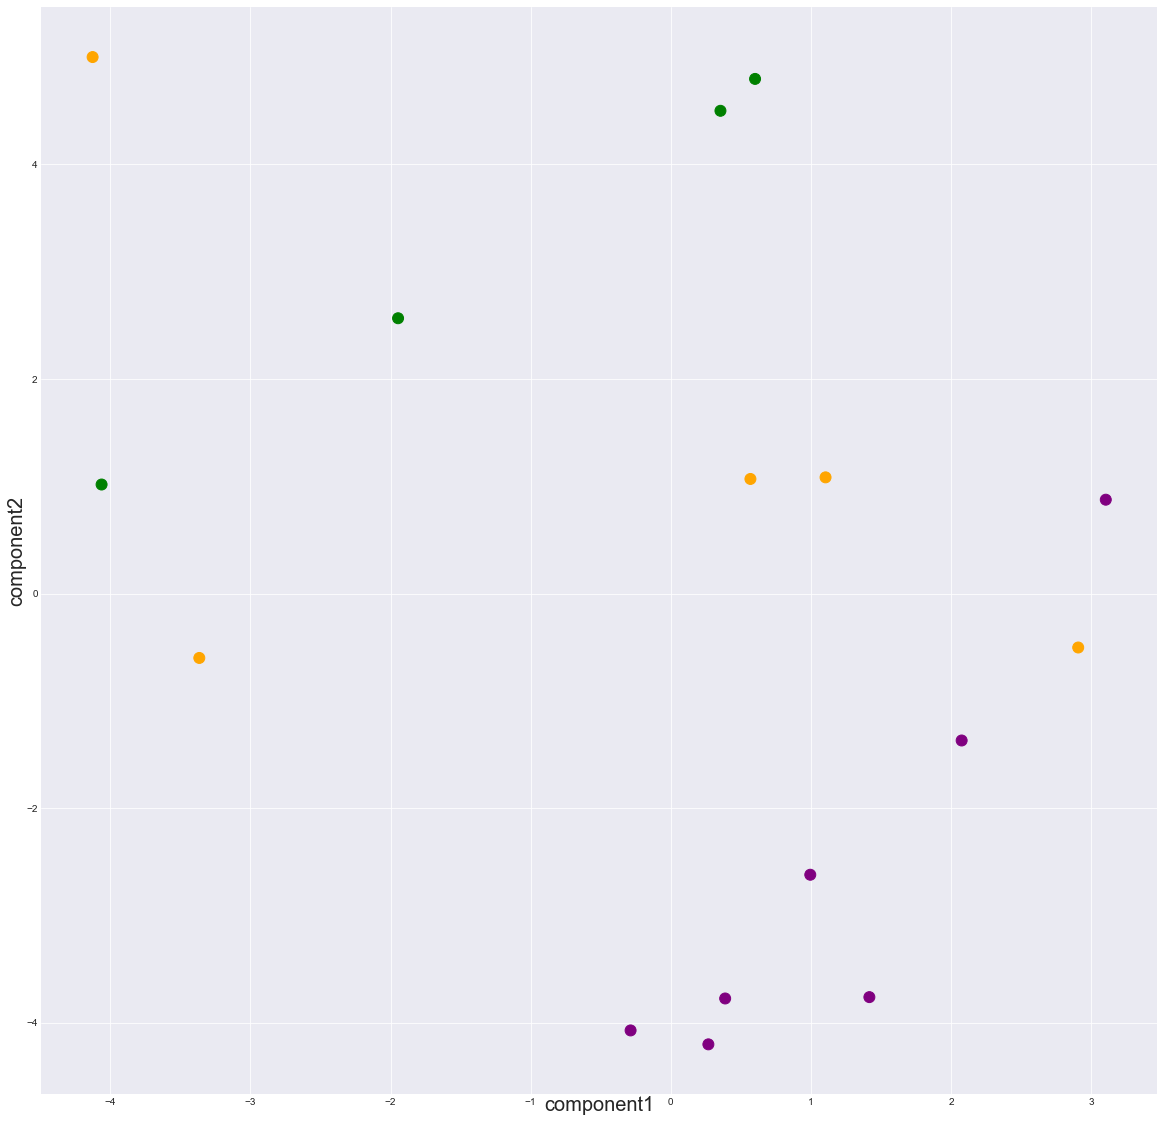

In [139]:
fig, ax = plt.subplots()
ax.scatter(projections[:,0], projections[:,1], c=colors, s=20*2*3)
ax.set_xlabel('component1')
ax.set_ylabel('component2')
font_dict = fontdict={'fontsize': 20,
 'fontweight' : rcParams['axes.titleweight'],
 'verticalalignment': 'baseline'}

ax.set_xlabel('component1', fontdict=font_dict)
ax.set_ylabel('component2', fontdict=font_dict)
#ax.legend(prop={'size': font_dict['fontsize']})
ax.grid(True)
if False:
    for i,_ in enumerate(colors):
        s = int(data.id_assigner.id2object(i + 1))
        ax.annotate(s, (float(projections[i, 0]), float(projections[i, 1])))
fig.savefig('Sampson-StEM2.png')

In [106]:
labels = clf1.fit_predict(viable_embeddings)

In [107]:
labels

array([0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2])

In [108]:
correct_labels = data.get_node_classes()
#correct_labels[-1] = 2

In [109]:
correct_labels

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2])

In [110]:
from sklearn.metrics.cluster import normalized_mutual_info_score, completeness_score

In [111]:
labels

array([0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2])

In [112]:
print(normalized_mutual_info_score(correct_labels, labels))
print(completeness_score(correct_labels, labels))

0.55953547116
0.55953547116


In [78]:
num_nodes = data.get_num_nodes()
dims = dims
epochs = epochs
lr = lr
lr_decay=0.0
weight_decay=0.0
lam = 0.00055
p = 2
delta = 1
delta0 = 0.5
dims_array = [dims, 20, 20]

In [79]:
model_fitter = models.fit_sine_model
triples, triples0 = util.triples_from_array(X, y)
batch_size = int(1.0 * len(triples))
batch_size0 = len(triples0)

In [80]:
sine_model = model_fitter(num_nodes, dims_array, triples, triples0, delta, delta0,
                                   batch_size, batch_size0, epochs + 20, lr=lr, lr_decay=lr_decay,
                                  lam=lam, p=p, p0=True)

Loss at epoch  1  is  0.9900801181793213
Loss at epoch  2  is  0.9672496914863586
Loss at epoch  3  is  0.9012645483016968
Loss at epoch  4  is  0.8669331073760986
Loss at epoch  5  is  0.8230847716331482
Loss at epoch  6  is  0.6971307396888733
Loss at epoch  7  is  0.6366087198257446
Loss at epoch  8  is  0.5979477167129517
Loss at epoch  9  is  0.5427374839782715
Loss at epoch  10  is  0.5000529885292053
Loss at epoch  11  is  0.48586365580558777
Loss at epoch  12  is  0.4802035093307495
Loss at epoch  13  is  0.4870007634162903
Loss at epoch  14  is  0.4784497320652008
Loss at epoch  15  is  0.46762552857398987
Loss at epoch  16  is  0.4625914394855499
Loss at epoch  17  is  0.4632117450237274
Loss at epoch  18  is  0.4593982994556427
Loss at epoch  19  is  0.4600185453891754
Loss at epoch  20  is  0.45819705724716187
Loss at epoch  21  is  0.45781809091567993
Loss at epoch  22  is  0.457608163356781
Loss at epoch  23  is  0.458426833152771
Loss at epoch  24  is  0.4579176008701324

Loss at epoch  217  is  0.4536505341529846
Loss at epoch  218  is  0.45364534854888916
Loss at epoch  219  is  0.45364028215408325
Loss at epoch  220  is  0.45363524556159973
Loss at epoch  221  is  0.453630268573761
Loss at epoch  222  is  0.45362532138824463
Loss at epoch  223  is  0.45362046360969543
Loss at epoch  224  is  0.45361560583114624
Loss at epoch  225  is  0.4536108076572418
Loss at epoch  226  is  0.4536060690879822
Loss at epoch  227  is  0.4536013603210449
Loss at epoch  228  is  0.45359671115875244
Loss at epoch  229  is  0.45359206199645996
Loss at epoch  230  is  0.45358750224113464
Loss at epoch  231  is  0.45358291268348694
Loss at epoch  232  is  0.4535784125328064
Loss at epoch  233  is  0.45357391238212585
Loss at epoch  234  is  0.4535694420337677
Loss at epoch  235  is  0.4535650312900543
Loss at epoch  236  is  0.45356065034866333
Loss at epoch  237  is  0.4535609185695648
Loss at epoch  238  is  0.45356911420822144
Loss at epoch  239  is  0.4535644650459289

Loss at epoch  429  is  0.45308443903923035
Loss at epoch  430  is  0.4530806243419647
Loss at epoch  431  is  0.4530767798423767
Loss at epoch  432  is  0.45307299494743347
Loss at epoch  433  is  0.453069269657135
Loss at epoch  434  is  0.45306554436683655
Loss at epoch  435  is  0.4530618190765381
Loss at epoch  436  is  0.4530581533908844
Loss at epoch  437  is  0.4530544877052307
Loss at epoch  438  is  0.4530508816242218
Loss at epoch  439  is  0.4530472755432129
Loss at epoch  440  is  0.453043669462204
Loss at epoch  441  is  0.45304012298583984
Loss at epoch  442  is  0.4530365467071533
Loss at epoch  443  is  0.45303305983543396
Loss at epoch  444  is  0.4530295431613922
Loss at epoch  445  is  0.45302605628967285
Loss at epoch  446  is  0.4530225992202759
Loss at epoch  447  is  0.4530191719532013
Loss at epoch  448  is  0.4530157744884491
Loss at epoch  449  is  0.4530123174190521
Loss at epoch  450  is  0.4530089199542999
Loss at epoch  451  is  0.4530055522918701
Loss at

In [81]:
clf2 = cluster.KMeans(n_clusters=3)
all_embeddings2 = sine_model.get_all_weights()
viable_embeddings2 = all_embeddings2[1:,:].astype(np.float64)
labels2 = clf2.fit_predict(viable_embeddings2)

In [82]:
normalized_mutual_info_score(correct_labels, labels2)

1.0

In [83]:
labels2

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2], dtype=int32)

In [84]:
correct_labels

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2])

In [85]:
mds2 = MDS(n_components=2)
projections2 = mds2.fit_transform(viable_embeddings2)

/Users/inzamamrahaman/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [86]:
projections2

array([[-0.39228019, -0.32264848],
       [-0.4087061 , -0.34238395],
       [-0.41682206, -0.32060146],
       [-0.37227374, -0.38004027],
       [ 0.22731926,  0.24207512],
       [ 0.0514199 ,  0.32551883],
       [ 0.26079585,  0.19330893],
       [ 0.23070361,  0.28130595],
       [ 0.17062233, -0.19236194],
       [ 0.16734214,  0.21810244],
       [ 0.21079689,  0.22736243],
       [-0.01200108, -0.01659126],
       [-0.02762999, -0.02402832],
       [ 0.2636853 ,  0.22069616],
       [ 0.0891099 , -0.11960638],
       [-0.04208204,  0.00989218]])

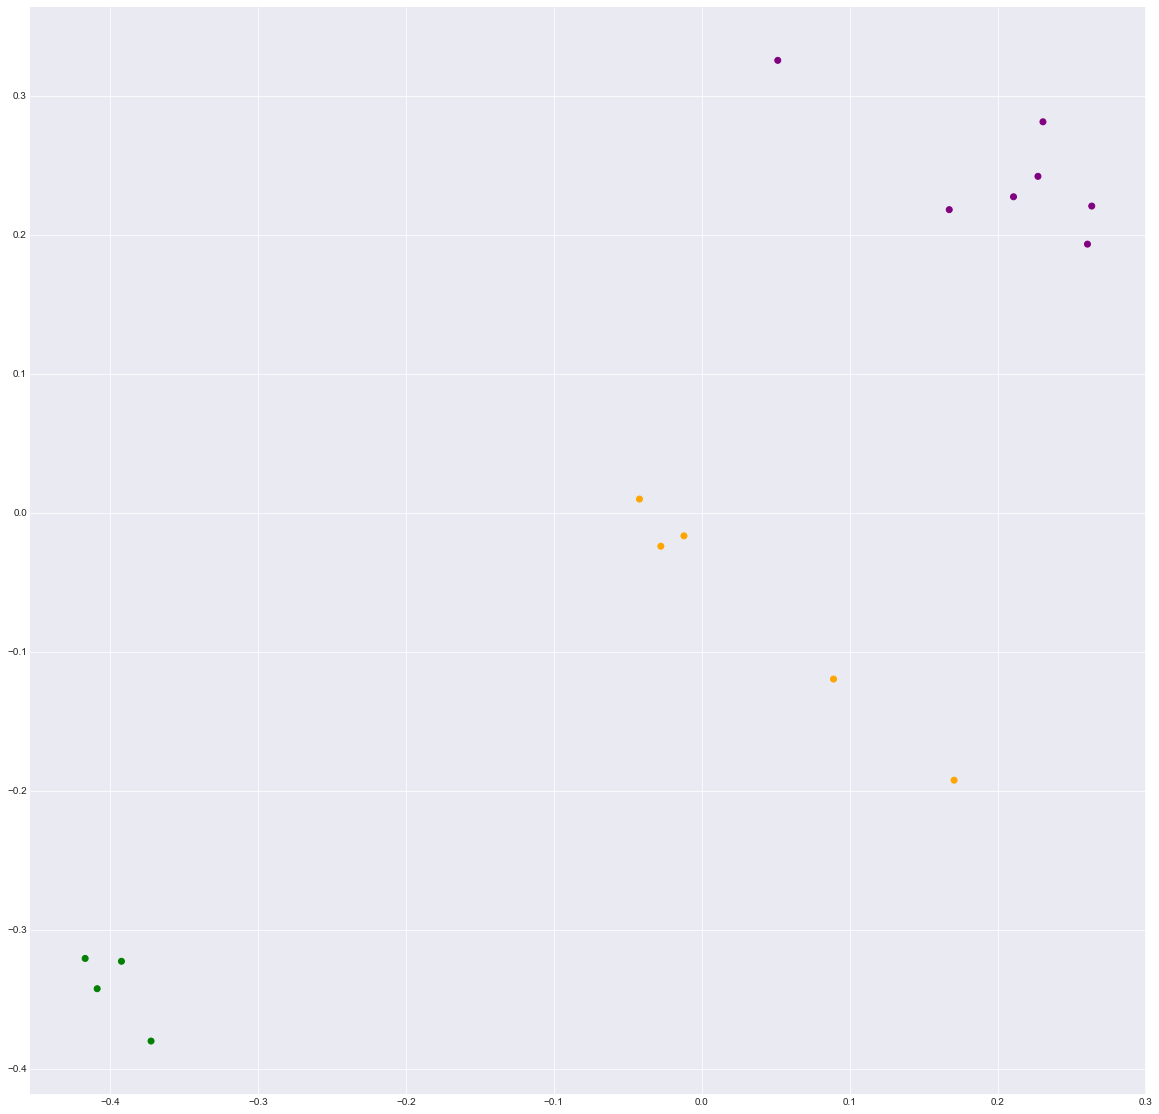

In [87]:
font_dict = fontdict={'fontsize': 20,
 'fontweight' : rcParams['axes.titleweight'],
 'verticalalignment': 'baseline'}

ax.set_xlabel('component1', fontdict=font_dict)
ax.set_ylabel('component2', fontdict=font_dict)
#ax.legend(prop={'size': font_dict['fontsize']})
ax.grid(True)
fig, ax = plt.subplots()
ax.scatter(projections2[:,0], projections2[:,1], c=colors)
# for i,_ in enumerate(colors):
#     s = int(data.id_assigner.id2object(i + 1))
#     ax.annotate(s, (float(projections2[i, 0]), float(projections2[i, 1])))
fig.savefig('Tribes-SiNE.png')

In [34]:
hope_model = models.fit_hope(dims, data.X, directed=False)

SVD error (low rank): 0.027559


In [35]:
all_embeddings3 = hope_model.get_all_weights()

In [40]:
clf3 = cluster.KMeans(n_clusters=3)
viable_embeddings3 = all_embeddings3
labels3 = clf3.fit_predict(viable_embeddings3)

In [41]:
normalized_mutual_info_score(correct_labels, labels3)

0.14656852561320027

In [43]:
mds3 = MDS(n_components=2)
projections3 = mds3.fit_transform(viable_embeddings3)

/Users/inzamamrahaman/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [44]:
projections3

array([[-0.17978805,  0.04811187],
       [-0.0872143 ,  0.16555319],
       [ 0.07553115,  0.09264095],
       [ 0.04156812, -0.02088484],
       [-0.14911723, -0.07295552],
       [-0.08788567,  0.08097569],
       [-0.00910938,  0.10167321],
       [-0.04184588, -0.09852043],
       [-0.09868159, -0.02951219],
       [ 0.07591886,  0.14945148],
       [-0.0697521 , -0.18109432],
       [ 0.1387922 , -0.03084327],
       [ 0.08647515,  0.00497352],
       [ 0.128694  , -0.12164165],
       [ 0.03996331, -0.1527649 ],
       [ 0.13645141,  0.06483722]])

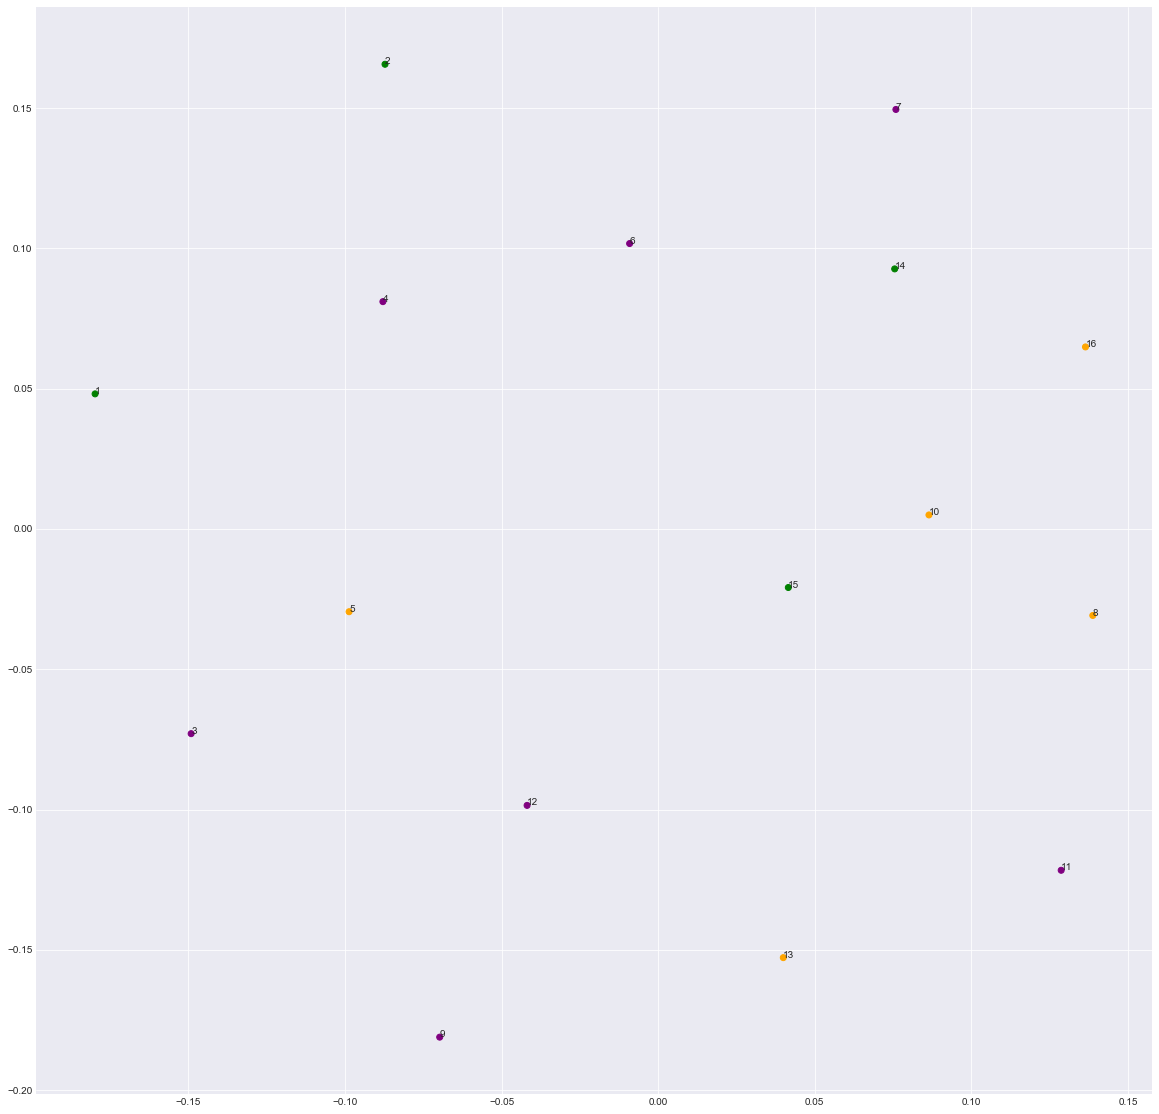

In [45]:
font_dict = fontdict={'fontsize': 20,
 'fontweight' : rcParams['axes.titleweight'],
 'verticalalignment': 'baseline'}

ax.set_xlabel('component1', fontdict=font_dict)
ax.set_ylabel('component2', fontdict=font_dict)
#ax.legend(prop={'size': font_dict['fontsize']})
ax.grid(True)
fig, ax = plt.subplots()
ax.scatter(projections3[:,0], projections3[:,1], c=colors)
for i,_ in enumerate(colors):
    s = int(data.id_assigner.id2object(i + 1))
    ax.annotate(s, (float(projections3[i, 0]), float(projections3[i, 1])))
fig.savefig('Tribes-HOPE.png')